In [1]:
import magcolloids as mgc
import os
import sys
import numpy as np
import pandas as pd
import scipy

#from multiprocessing import Pool
#import tqdm.auto as tqdm

sys.path.insert(0, '../icenumerics')
import icenumerics as ice
sys.path.insert(0, '../Analysis')
from importlib import reload  
import chirality as chi
reload(chi)

import matplotlib.pyplot as plt
from matplotlib import patches

# Statistical Chirality study

    In this script, I will use the chirality.py file to compute the dataframe of the chirality of each frame of all the experiments. In order to then analyze the data in a statistical way. After that I will add a loop to generate the frames of the chirality video.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [3]:
load_obj = mgc.trj_lazyread(os.path.join(data_directory,
                                             "ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.lammpstrj"),
                                                output = ["x","y","z","mux","muy","muz"]) 
    
bnd = load_obj.get_bounds(slice(0,250000,50))
trj = load_obj.read_trj(slice(0,250000,50))
col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])   

In [4]:
col_trj

type           x           y    z       dx       dy   dz  \
frame  id                                                               
0      0        2   10.865500   16.046101  0.0 -8.66025 -5.00000 -0.0   
       1        2  -10.865500   16.046101  0.0  8.66025 -5.00000 -0.0   
       2        2   10.865500  -16.046101  0.0 -8.66025  5.00000 -0.0   
       3        2  -10.865500  -16.046101  0.0 -8.66025 -5.00000  0.0   
       4        2   30.305901   10.865500  0.0 -5.00000  8.66025  0.0   
...           ...         ...         ...  ...      ...      ...  ...   
250000 1995     3  787.984009 -880.687988  0.0 -0.00000 -4.52580 -0.0   
       1996     3  834.335999 -834.335999  0.0 -0.00000 -4.52580 -0.0   
       1997     3  880.687988 -834.335999  0.0  4.52580  0.00000  0.0   
       1998     3  834.335999 -880.687988  0.0 -4.52580 -0.00000 -0.0   
       1999     3  880.687988 -880.687988  0.0  0.00000  4.52580  0.0   

                   cx        cy   cz  
frame  id                             
0      0    -4.330101 -2.500001  0.0  
       1     4.330101 -2.500001  0.0  
       2    -4.330101  2.500001  0.0  
       3    -4.330199 -2.500000  0.0  
       4    -2.500000  4.330199  0.0  
...               ...       ...  ...  
250000 1995  0.039978 -2.437988  0.0  
       1996  0.228027 -1.731995  0.0  
       1997  2.564026 -0.286987  0.0  
       1998 -2.380005  0.360962  0.0  
       1999 -0.179993  2.224976  0.0  

[102000 rows x 10 columns]

In [5]:
data_directory_1 = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts"

In [6]:
df = pd.read_csv(os.path.join(data_directory_1,"Pentagon_coordinates_Script-9.2.dat"), sep = '\t',index_col = [0])

In [7]:
df['dx'] = np.NaN
df['dy'] = np.NaN
df['dz'] = np.NaN
df['Chi'] = np.NaN

In [8]:
%%time
i = 0
    
pentagons = chi.take_spin_all_pentagons(col_trj, df, frame = 250000)

/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


CPU times: user 8.8 s, sys: 0 ns, total: 8.8 s
Wall time: 8.8 s


In [9]:
%%time
new_pentagons = chi.chirality(pentagons);

../Analysis/chirality.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_pen['Chi'] = Chi;


CPU times: user 4.58 s, sys: 0 ns, total: 4.58 s
Wall time: 4.58 s


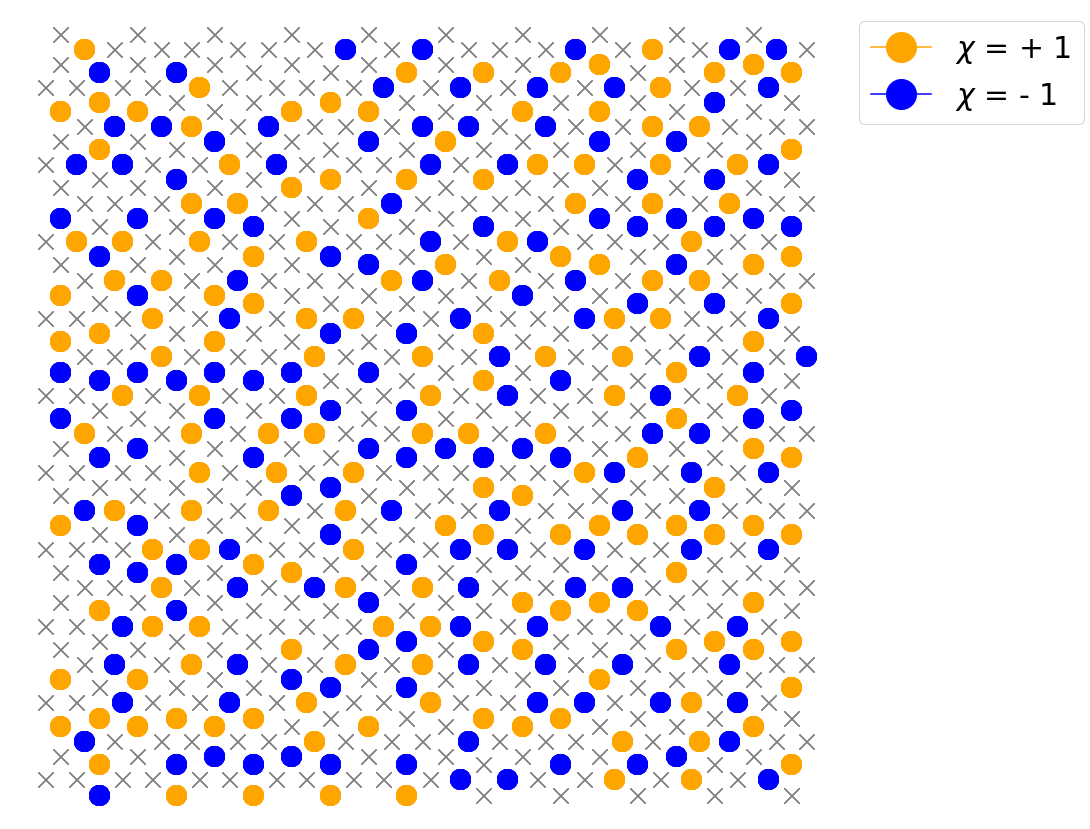

In [10]:
chi.show_chirality_frame(new_pentagons, 'l' ,'b')

In [11]:
np.unique(col_trj.index.get_level_values('frame'))

array([     0,   5000,  10000,  15000,  20000,  25000,  30000,  35000,
        40000,  45000,  50000,  55000,  60000,  65000,  70000,  75000,
        80000,  85000,  90000,  95000, 100000, 105000, 110000, 115000,
       120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000,
       160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000,
       200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000,
       240000, 245000, 250000])

No handles with labels found to put in legend.


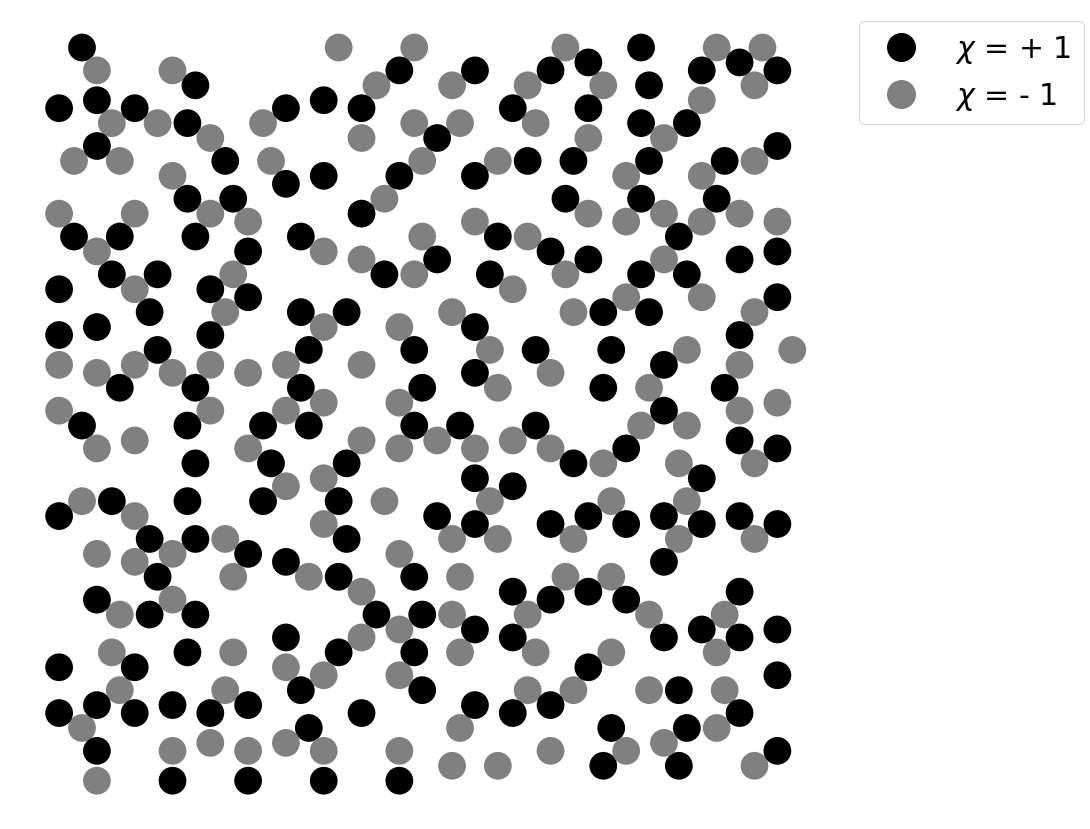

In [12]:
chi.show_chirality_unit(new_pentagons)

CPU times: user 260 ms, sys: 3.89 ms, total: 264 ms
Wall time: 262 ms


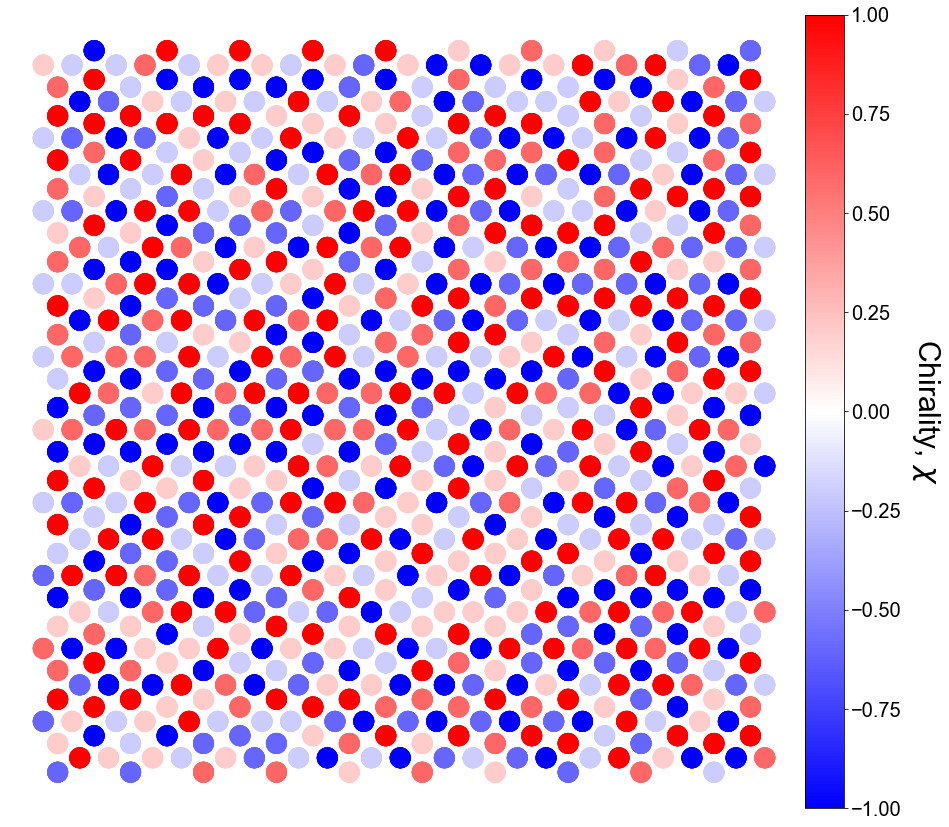

In [13]:
%%time
chi.plot_frame(new_pentagons, name ='ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0_frame-' , frame = str(i))

In [15]:
%%time
for i in np.unique(col_trj.index.get_level_values('frame')):
    print(str(i))
  
    
    #pentagons = chi.take_spin_all_pentagons(col_trj, df, frame = i)
    #new_pentagons = chi.chirality(pentagons);
    #chi.show_chirality_frame(new_pentagons, name ='ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0_frame-' , frame = str(i))
#chi.plot_frame(new_pentagons, name ='ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0_frame-' , frame = str(i))

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
CPU times: user 10.1 ms, sys: 2 µs, total: 10.1 ms
Wall time: 7.99 ms
